What do straight lines look like for different metric tensors?

In [1]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def norm(vec, metric):
    return torch.sqrt(vec @ metric @ vec)

def dist(vec1, vec2, metric):
    return norm(vec1 - vec2, metric)

def angle(vec1, vec2, metric):
    return torch.acos(torch.max(torch.Tensor([-1]), torch.min(torch.Tensor([1]), (vec1 @ metric @ vec2) / (norm(vec1, metric) * norm(vec2, metric)))))

def absangle(vec1, vec2, metric):
    return torch.acos(torch.min(torch.Tensor([1]), torch.abs((vec1 @ metric @ vec2) / (norm(vec1, metric) * norm(vec2, metric)))))

In [3]:
var1 = 1
var2 = 1
var12 = 0.9
cov_mat = torch.Tensor([[var1, var12],[var12, var2]])
inv_cov_mat = torch.inverse(cov_mat)

# the metric tensor
g = inv_cov_mat

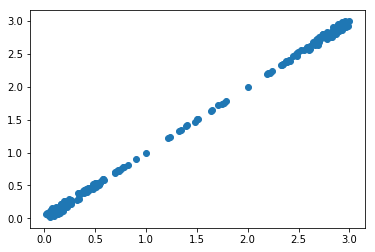

In [4]:
p1 = torch.Tensor([1, 1])
p2 = torch.Tensor([2, 2])

pts = [p1, p2]

xmin = 0
xmax = 3

ymin = 0
ymax = 3

angle_epsilon = 0.1

for i in range(10 ** 4):
    pt = torch.rand(2) * (xmax - xmin) + xmin
    if (absangle(pt - p1, pt - p2, g) < angle_epsilon):
        pts.append(pt)
        
pts = torch.stack(pts)
plt.scatter(pts[:,0], pts[:,1])
plt.show()

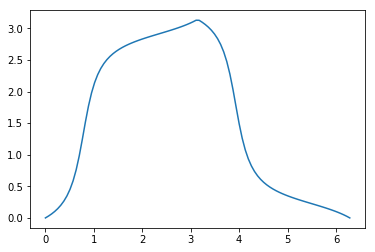

In [6]:
pt1 = torch.Tensor([1, 0])

thetas = []
angles = []

for theta in torch.linspace(0, 2 * np.pi, 100):
    pt = torch.tensor([torch.cos(theta),torch.sin(theta)])
    thetas.append(theta)
    angles.append(angle(pt1, pt, g))
    
plt.plot(thetas, angles)
plt.show()

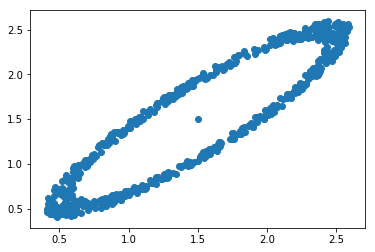

In [7]:
p1 = torch.Tensor([1.5, 1.5])

pts = [p1]

xmin = 0
xmax = 3

ymin = 0
ymax = 3

target_dist = 1
dist_epsilon = 0.1

for i in range(10 ** 4):
    pt = torch.rand(2) * (xmax - xmin) + xmin
    if (torch.abs(dist(pt, p1, g) - target_dist) < dist_epsilon):
        pts.append(pt)
        
pts = torch.stack(pts)
plt.scatter(pts[:,0], pts[:,1])
plt.show()